## **Implement a Training Loop for a Binary Classifier Network** 🧠

<a name='1'></a>
### **1 - Overview**  ###

Welcome to the World of Neural Networks! 🤖✨

You have just embarked on a journey that has the potential to transform the way you think about solving problems with data.

In this lesson, you will be guided through the process of building, training, and evaluating your own neural network, specifically, for a binary classification problem. But that's just the start! You will also get hands-on experience with layers, activation functions, optimizers, and the key concepts that power machine learning. 

By the end of this lesson, you will have the knowledge but also the skills to start experimenting with your own data and build powerful and yet customized neural networks. It's worth also mentioning that an intermediate level of Python is required, along with a basic understanding of how **classes** work.

So, get ready to experiment and dive in — your journey into deep learning starts now! 🚀

### **Important Note on Submission to the AutoGrader** ##

Before submitting your assignment to the AutoGrader, please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

Each assignment is labeled as **🎯 Challenge**, so whenever you see this, it’s time to solve the task! Make sure to complete every challenge, as your submission will only be considered if all challenges are completed. Also, whenever you encounter the '### YOUR CODE STARTS HERE ####' pattern, it's time for you to provide your solution, until you see the ### YOUR CODE ENDS HERE #### pattern.

In this lesson, we’ll have **5 challenges** for you to tackle! 

<a name='2'></a>
### **2 - Packages** ###

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](https://numpy.org/doc/) is the fundamental package for scientific computing with Python
- [pandas](https://pandas.pydata.org/docs/) is a common package to analyze data
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python
- [Pytorch](https://pytorch.org/docs/stable/index.html) is our selected framework to build Neural Networks!
- [scikit-learn](https://scikit-learn.org/stable/) is a machine learning library that also provides many other functionalities


In [1]:
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from tests.unit_tests import *

from utils.helper_functions import plot_decision_boundary, accuracy_fn

%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

<a name='3'></a>
### **3 - Creating Our Dataset** ###

To begin our journey, the first step is to generate a **synthetic dataset** that will be used for this lesson and training our neural network 🤖. We will use the `make_circles` function from scikit-learn, which creates a set of data points and arranged in two circles 🔵🔴. You might be asking why do we need a circle data set for this lesson? Well, it turns out that this type of dataset is ideal for classification tasks because it features a **non-linear decision boundary**, which is a common challenge in machine learning.

With **1000 samples** and adding a small amount of noise, we will be mimicking a real-world scenario where the data is not always perfectly clean. Here's the code to generate the dataset:

In [2]:
n_samples = 1000
# create circle dataset:
X, y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

Let's utilize Pandas 🐼 package to understand better the structure of our dataset:

In [4]:
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1],
                       "label": y})

In [5]:
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<a name='3.1'></a>
#### **3.1 - Visualizing the Dataset** 🔍

Now it's time to visualize it! By plotting the data points, we can better understand how the data is distributed and how is the relationship between the features and the target labels. We will leverage the **plt.scatter** method from matplotlib to create our visualization:

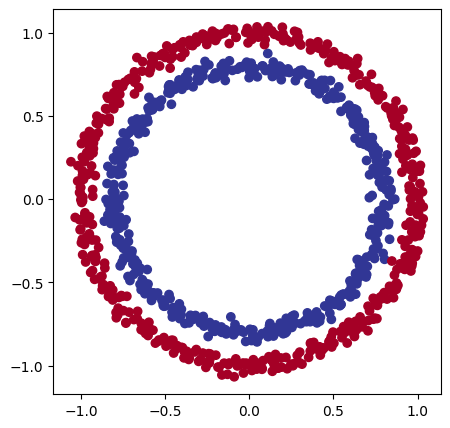

In [6]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu # Red-Yellow-Blue Colormap
           )

<a name='3.2'></a>
#### **3.2 - Converting Data to Tensors and Creating Train-Test Splits** 🔄

To begin training our neural network, we need to convert our dataset into **PyTorch tensors**, which are essential for working with neural networks in PyTorch. Remember from previous lessons, that **Tensors** allow us an efficient computation, especially when working with huge datasets!

In addition, we'll split our data into **training** and **testing**. Recall from earlier lessons that this is an essential step in any Machine Learning project: **we need to expose our trained model to unseen data, in order to verify that it has learned 🧠 the patterns of the data 📈 properly**.  

Let’s proceed with these steps:

In [7]:
torch.__version__

'2.3.1+cpu'

In [8]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)

In [11]:
print('No. of train examples: ', len(X_train))
print('No. of test examples: ', len(X_test))

No. of train examples:  800
No. of test examples:  200


In [12]:
print('No. of train examples: ', len(y_train))
print('No. of test examples: ', len(y_test))

No. of train examples:  800
No. of test examples:  200


With our data converted into tensors and the properly split, we are now ready to feed it into our neural network model and start training! 🚀

<a name='4'></a>
### **4 - Building the Model** ⚙️🧠

In this section, you will get get *hands-on* experience in building a neural network model for a binary classifier! 💪 

But don’t worry 😰, we have got you covered🛡️! Even if the content feels overwhelming or you need to review certain parts of our previous lessons, we will provide all the necessary materials to help you understand every step.

We will begin by setting up our device (CPU) **(1)** for the model to use during training. Then, we will move on to **building the model architecture (2)** by subclassing `nn.Module`, which is the core-building-block of all neural networks in PyTorch. After that, we will **define a loss function and optimizer (3)**, which are essential for training our model and improving its performance. Finally, we will proceed to **training and test loops (4)** to put everything together and start the learning process.

Let’s get started! 🚀

<a name='4.1'></a>
#### **4.1 - Our First Neural Network Architecture** 🧠

Your goal is to build the necessary artifacts for our Binary Classifier Neural Network, which follows the next architecture (shown in the image below):

<div style="text-align: center;">
    <h2>Binary Classifier Neural Network </h2>
    <img src="./utils/images/nn_1.png" style="width:600px;height:300px;">
</div>

This is a very basic diagram for you to interpret. As you can see, it consists on:

1. **Input layer:** our input feature matrix [$X_1$, $X_2$]
2. **Hidden layer:**  our layer of neurons (nodes) that lies between input layer and output layer. <span style="color: rgb(181, 206, 168);">The number of neurons for our very first proposed architecture is 5 </span>. Remember the core concepts of the Hidden Layer:

    - The Hidden layer(s) help to extract relevant features from the input layer. <span style="color: rgb(181, 206, 168);">Our first architecture only consists of 1 layer</span> (tempted to add more? 😏) 
    - Each neuron in the hidden layer applies a mathematical transformation to the incoming data. Activation functions like ReLU, sigmoid, and tanh introduce non-linearity into the model, allowing it to learn more complex relationships than just a linear combination of inputs. <span style="color: rgb(181, 206, 168);">For our first architecture, we are going to use the ReLU activation function </span>
3. **Output layer:** final layer that produces the model's predictions. For binary classification, the output consists of 1 neuron and it often uses the <span style="color: rgb(181, 206, 168);">sigmoid activation function</span> to provide the probabilities (between 0 and 1) for classifying a sample into one or two classess (1 or 0, in our case).

#### A piece of advice 💡:

- By including more Hidden layers in our architecture, we introduce more complexity and more learning capabilities! (Did Deep Learning come to mind? 😊). But be careful!⚠️ adding more hidden layers can cause the model to memorize our data and generalize poorly on the test set!.
- You might be asking why did we choose the Relu activation activation function? Well, Machine Learning is about experimenting 🧪! so are free to try others. However, there are just some considerations you need to take into account. [You can follow this link to explore in detail](https://www.geeksforgeeks.org/activation-functions-in-pytorch/)

And last but not least, let's not forget the core mathematical concepts behind Neural Networks ... 📚 

The forward propagation for the neural network can be defined using the following equations:

1. **Input to the Hidden Layer**:

   $$Z^{[1]} = W^{[1]} X + b^{[1]}$$

   - Where:

     - $W^{[1]}$  is the weight matrix of the hidden layer (composed of 5 neurons in our case)
     - $X$ is the input feature matrix, with ***m*** number of examples (1,000 in our case) and **n** features (2 in our case)
     - $b^{[1]}$  is the bias vector of the Hidden Layer
     - $Z^{[1]}$  Input to the Hidden Layer (pre-activation)

2. **Hidden Layer Output (Using ReLU Activation Function)**:

   $$A^{[1]} = \text{ReLU}(Z^{[1]}) \tag{2}$$

   - Where:

     - $A^{[1]}$ is the activated output of the Hidden Layer
     - $ReLU$ is the activation function applied to the output of the Hidden Layer

3. **Hidden Layer to Output Layer**:

   $$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$

    - Where:

    - $W^{[2]}$ is the weight matrix for the Output Layer (1 neuron in our case)
    - $b^{[2]}$  is the bias vector for the Output Layer.
    - $Z^{[2]}$  Hidden Layer to Output Layer (pre-activation)

4. **Output Layer (Using Sigmoid Activation)**:

   $$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})$$

   - Where:

     - $A^{[2]}$ = $\hat{Y}$,  is the output of the network, which represents the predicted probabilities in our case, after they are passed to the sigmoid activation function.
     - **sigmoid** is the activation function of the Output Layer


<a name='4.2'></a>
#### **4.2 - Setup device agonistic code**

Firstly, we will need to configure our device that the model will use for training. For our learning purposes and the current environment configuration, we are only allowed to use **'cpu'**. However, just keep in mind that if we are lucky enough to have one of these powerful GPUs on our computer (or, of course, if we're using the cloud), we can really speed up the training phase!

[If you are interested to know more about it, please follow this Pytorch documentation.](https://pytorch.org/get-started/locally/)


In [13]:
device = "cpu"

<a name='4.3'></a>
#### **4.3 - Constructing the model (by subclassing nn.Module)**

In this step, we will build a **simple neural network** by **subclassing** `nn.Module`, which is the foundation for all models in PyTorch. The model we’ll create will have two fully connected layers (`nn.Linear`), and we’ll define the **forward pass** to outline how the data flows through the network.

**NOTE:** Just remember that we have initially imported our Pytorch `nn` module, when we loaded our packages: 

```python 
from torch import nn

### 🎯**Challenge 1: Model Architecture Definition**

In this step, you will define the architecture of the neural network by constructing the first version of the model, **ModelV1**, using **nn.Module**. You will set up the linear layers and prepare the framework for the further steps of training and optimization. The **nn.Linear** module will be used to define Hidden Layer and Output Layer.

Please consider that in this step we will only define how the layers and neurons are connected to each other. Other configurations will be performed later on the lesson.

The architecture will be defined as explained on **Section 4.1 - Our First Neural Network Architecture**

- The first layer should take the input features and transform them into 5 neurons
- The second layer will receive the output from the first layer and produce 1 neuron

In [16]:
### GRADED TASK: Model Architecture Definition ###

# 1. Construct our first model (version 0) that subclasses nn.Module
class ModelV1(nn.Module):
    def __init__(self):

        # NEURAL NETWORK ARTIFACTS #

        # 2. Calling the parent class constructor to initialize the nn.Module
        super().__init__() 

        # 3. Create the Linear Layers (nn.Linear) and define the hidden units #
        # 3.1 Think about how many features come out of layer_1, and how many you want going into layer_2.

        ### YOUR CODE STARTS HERE ###
        
        self.layer_1 = nn.Linear(in_features = 2  , out_features = 5)  
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1 )  

        ### YOUR CODE ENDS HERE ###

    # 4. Define a forward() method that defines the forward pass
    def forward(self, x):
        """
        In the forward pass, data flows through the layers in a sequentially manner. 
        Here is how we apply the layers and activation functions step by step:

        1. Pass data through `layer_1` (Hidden Layer 1)
        2. Pass the result through `layer_2` (Output Layer) 
        """
        return self.layer_2(self.layer_1(x)) 
    
model_v0_test(ModelV1, device)

Model architecture is defined correctly!


In [17]:
# Creating the Neural Network Architecture:

model_0 = ModelV1().to(device)
model_0

ModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

🔍 **More to explore:** From our instantiated object , we can explore several methods that PyTorch offers and go deep dive into the configuration. 

For example, we can take *state_dict()*** from our **model_0** object:

In [18]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0339,  0.1148],
                      [ 0.4054, -0.0042],
                      [-0.5630,  0.2814],
                      [ 0.0431,  0.4833],
                      [-0.0514,  0.6888]])),
             ('layer_1.bias',
              tensor([ 0.0677, -0.0237,  0.5823,  0.5800,  0.4038])),
             ('layer_2.weight',
              tensor([[ 0.4404,  0.2057, -0.1679,  0.2943,  0.3113]])),
             ('layer_2.bias', tensor([0.1339]))])

**Looks familiar?** it turns out that these are the initialized weight and biases for each corresponding layer. PyTorch uses Kaiming Uniform distribution to set these values, assuring that the activations neither shrink to zero nor explode as they propagate through each layer. Although this configuration works for our purposes, [you can deep dive into more details by following this link](https://pytorch.org/docs/stable/nn.init.html)

In [19]:
weights_layer_1 = model_0.state_dict()['layer_1.weight'].detach().numpy()
biases_layer_1 = model_0.state_dict()['layer_1.bias'].detach().numpy()  

print('Shape of weights for the first layer',weights_layer_1.shape)
print('Shape of biases for the first layer',biases_layer_1.shape)

Shape of weights for the first layer (5, 2)
Shape of biases for the first layer (5,)


<a name='4.4'></a>
#### **4.4 - Defining Loss Function and Optimizer**

Now that we have set up our model architecture, it is time to select the **loss function** and **optimizer** for training. 

✅ The loss function helps us measure how well the model’s predictions are.

✅ The optimizer adjusts the model’s parameters to minimize this loss during training.

Step 1: Choose the Loss Function

We begin by choosing an appropriate loss function. For binary classification tasks, where the output is either 0 or 1, we commonly use **Binary Cross-Entropy Loss (BCELoss)**. However, if the model’s output is not already passed through a sigmoid activation function, you can use **BCEWithLogitsLoss**. This loss function combines the sigmoid activation and the binary cross-entropy loss in one step, making it computationally more efficient.

Rember that our Loss Function for the Binary Classifier Architecture Network is represented as:

$$
\text{Loss} = - \frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\sigma(z_i)) + (1 - y_i) \log(1 - \sigma(z_i)) \right] 
$$

- Where:

    - $y_{i}$ is the true label for the i\-th sample in the batch, and it can be `0` or `1`
    - $z_{i}$  is the logit output from the model (before applying the sigmoid function)
    - N is the total number of samples in the current batch

Remember that logits are the raw scores from the model (often called log-odds), and they are produced by the final layer. 

### 🎯**Challenge 2: Loss Function Definition**

Use **`BCEWithLogitsLoss()`** from the **`torch.nn` module** to create the **`loss_fn`** for the binary classification task. Do **not** include any additional parameters in the initialization. Ensure the loss function is correctly initialized and ready to be used in training.

In [20]:
### GRADED TASK: Loss Definition ###

### YOUR CODE STARTS HERE ###
loss_fn = nn.BCEWithLogitsLoss()
#### YOUR CODE ENDS HERE ###
grade_loss_fn(loss_fn)

Correctly initialized the loss function!


Step 2: Setting up the Optimizer

Next, we will select an optimizer. The optimizer's goal is to adjust the model's parameters (weights and biases) during training. The most basic optimizer is **Stochastic Gradient Descent (SGD)**, which updates the parameters based on the gradients of the loss function with respect to the parameters. As we have seen in previous lessons, the SGD helps to overcome slow convergence and improves optimization speed. But as stated before,  Machine Learning is about experimenting 🧪! So you are welcome to try the ones we have seen in previous lessons, and also following the next link, to see [the optimizers available in Pytorch](https://pytorch.org/docs/stable/optim.html)

#### Formula:

The update rule for Stochastic Gradient Descent is:

$$
\theta \leftarrow \theta - \alpha \cdot \nabla_\theta J(\theta) \tag{1}
$$

Where:
- $\theta$ is the vector of the model's parameters (weights and biases)
- $\nabla_\theta J(\theta)$ is the gradient of the loss function $J(\theta)$ with respect to the model parameters $(\theta)$.
- $\alpha$ is the **learning rate** that controls how much the parameters are updated in each step.

#### How it works?

✅  **The Gradient Computation**: The gradient of the loss function is computed with respect to the model parameters. For SGD, the gradient is computed using **one sample** (But it can be configured to take small batches) at a time.

✅  **The Parameter Update**: The model parameters $\theta$ are updated by subtracting a fraction of the calculated gradient and scaled by the learning rate $(\alpha)$.

✅  **This is an iterative Process**: This process is repeated for each sample (or mini-batch) in the dataset, in order to gradually improving the model parameters to minimize the loss function.

⚡ "Don't worry, everything will start to make sense as we dive into the next challenge!

### 🎯**Challenge 3: Optimizer Configuration**

Your goal for this challenge is to complete the configuration of our optimizer! The Python class **OptimizerConfigurator** has already been set up for you to instantiate the optimizer object. Your task is to correctly set the learning rate to **10%** 

In [21]:
### GRADED FUNCTION: Optimizer Configuration

class OptimizerConfigurator:
    """
    A class to configure the SGD optimizer for a given model with a specified learning rate.
    
    Parameters:
    - model: The model to optimize (PyTorch model).
    """
    
    def __init__(self, model):
        self.model = model
        self.optimizer = None      
    def configure_optimizer(self):
        """
        Configures the SGD optimizer with the given model and learning rate.
        
        Returns:
        - optimizer: The configured optimizer.
        """
        ### YOUR CODE STARTS HERE ###
        self.optimizer = torch.optim.SGD(params=self.model.parameters(), lr= 0.1)
        ### YOUR CODE ENDS HERE ###
        return self.optimizer

optimizer_configurator = OptimizerConfigurator(model_0)
optimizer = optimizer_configurator.configure_optimizer()
test_optimizer_configuration(optimizer)


Optimizer is correctly configured with learning rate 0.1!


<a name='4.5'></a>
#### **4.5 - Building a Training and Testing Loop** 🧠

Finally we are reaching out our final step in developing our Neural Network for binary classification! So things are going to turn very interesting from now on... ready? 🔥

In this section, you are going to implement 🛠️ the training and evaluation loop 🔄 for a neural network model using PyTorch. This process involves training the model, updating its parameters, and then evaluating its performance on the test data after each iteration (i.e. **epoch**).

#### But before moving on, let's not forget the core functionality of **BACKPROPAGATION**: 📚

✨ Backpropagation is the magic behind how a neural network learns from data!

✅ It uses the Loss function to assess how the model performs with the actual data. After the loss is computed, it applies the **chain rule** to calculate the gradients (how much each parameter contributes to the loss). 

✅ We use the **chain rule** to propagate the error backwards from the output layer to the input layer

For each layer, the gradient is computed as:

$$
\frac{\partial L}{\partial W^{[l]}} = \frac{\partial L}{\partial Z^{[l]}} \cdot \frac{\partial Z^{[l]}}{\partial W^{[l]}}
$$

- Where:
    
    - $\frac{\partial L}{\partial W^{[l]}}$ is the gradient calculated using the chain rule

✅ Essentially, we somewhat **trace** the error back through the network to compute how each weight and bias in the network contributed to the final error.

#### 🎯**Challenge 4: Training and Evaluation Loop**

In this task, you will implement a training loop for your model. You will iterate through multiple epochs, performing the following steps:

1. **Set reproducibility**: set random seed to ensure that the results are reproducible 

2. **Setting No. of epochs**: how many times the model **will see** the entire training data?

3. **Training Loop** 🔄: for each iteration (epoch) ...

    3.1 **Forward Pass**: We set the model into **training mode**. We also compute the logits and apply the sigmoid function. 

    3.2 **Calculate Loss and Accuracy**: Compute the loss function and accuracy for each iteration.

    3.3 **Zeroing the Gradients**: Before performing backpropagation, we use the **zero_grad()** (zero the gradients) to the <span style="color: rgb(181, 206, 168);">optimizer object</span>. PyTorch accumulates gradients by default, so we need to clear them out before computing the gradients for the current batch.

    3.4 **Backpropagation**: Use the **backward() method** to compute the gradient of the <span style="color: rgb(181, 206, 168);">loss object</span> with respect to the model parameters.

    3.5 **Optimizer Step (Gradient Descent)**: It uses **step() method** to apply the gradient updates to the model parameters using the <span style="color: rgb(181, 206, 168);">optimizer object </span>, during backpropagation. 

4. **Evaluation Step** 📋: After the training step, we evaluate how well the model performs on the test data.
    

We have already prepared the core artifacts of the process, but you will need to complement the training and evaluation loop by filling in the missing pieces 🧩. We have imported the **accuracy_fn** which takes the **true labels** and **predicted labels**, respectively, to estimate the accuracy properly.

In [22]:
# 1. Setting reproducibility
torch.manual_seed(42)

# 2. Setting No. of Epochs
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [24]:
### GRADED TASK: 3.Training and Evaluation Loop ###

class TrainingEvaluationLoop:
    """
    The class to configure and execute the training evaluation loop
    
    Parameters:
    model: The model to optimize (PyTorch model)
    """
    def __init__(self, model, epochs, optimizer, loss):
        self.model = model
        self.epochs = epochs
        self.optimizer = optimizer
        self.loss = loss

    def execute_training_loop(self):
        """
        Performs the training loop for each epoch

        Returns:
        - optimizer: The configured optimizer.
        """
        for epoch in range(self.epochs):
            # 3.1 Forward Pass  
            self.model.train()
            y_logits = self.model(X_train).squeeze()
            y_pred = torch.round(torch.sigmoid(y_logits))  
            # 3.2 Calculate the Loss and Accuracy                
            loss = self.loss(y_logits, y_train)
            acc = accuracy_fn(y_true = y_train,
                                y_pred = y_pred)
               
            # 3.3 Use the self.optimizer to set zeroing the gradients #
            #### YOUR CODE STARTS HERE ###
            self.optimizer.zero_grad()
            #### YOUR ENDS ENDS HERE ###
    
            for param in self.model.parameters():
                # Before backward pass, gradients should be None (zeroed out)
                 assert param.grad is None, f"Error: You have not zeroed the gradients! Please check challenge 4 instructions!"
              
            # 3.4 Use the loss object to set the backward backpropagation 
            ### YOUR CODE STARTS HERE ###
            loss.backward()
            ### YOUR CODE ENDS HERE ###
              
            for param in self.model.parameters():
                 assert param.grad is not None, f"Error: Loss Backpropagation not properly configured Please check challenge 4 instructions!"
           
            # 3.5 Setting Optimizer step for updating the gradients

            self.optimizer.step()
            
            # 4. Evaluation Step
            self.model.eval()
            with torch.inference_mode():
                test_logits = self.model(X_test).squeeze()
                test_pred = torch.round(torch.sigmoid(test_logits))
                test_loss = self.loss(test_logits,
                                    y_test)
                test_acc = accuracy_fn(y_true = y_test,
                                        y_pred = test_pred)
                
            if epoch % 100 == 0:
                print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}%, | Test Loss:  {test_loss:.5f}, Test acc: {test_acc:.2f}%")
        
        print('\033[92mAll tests passed!')
        return self.model     

model_0 = ModelV1().to(device)
optimizer_configurator = OptimizerConfigurator(model_0)
optimizer = optimizer_configurator.configure_optimizer()
train_val_loop_config = TrainingEvaluationLoop(model_0, epochs, optimizer, loss_fn)
model_artifact = train_val_loop_config.execute_training_loop()


Epoch: 0 | Loss: 0.69796, Acc: 51.88%, | Test Loss:  0.69440, Test acc: 58.00%
Epoch: 100 | Loss: 0.69331, Acc: 49.25%, | Test Loss:  0.69271, Test acc: 53.00%
Epoch: 200 | Loss: 0.69310, Acc: 50.88%, | Test Loss:  0.69336, Test acc: 49.00%
Epoch: 300 | Loss: 0.69304, Acc: 51.12%, | Test Loss:  0.69376, Test acc: 46.50%
Epoch: 400 | Loss: 0.69301, Acc: 51.25%, | Test Loss:  0.69403, Test acc: 47.50%
Epoch: 500 | Loss: 0.69299, Acc: 50.88%, | Test Loss:  0.69423, Test acc: 47.00%
Epoch: 600 | Loss: 0.69299, Acc: 51.25%, | Test Loss:  0.69437, Test acc: 46.50%
Epoch: 700 | Loss: 0.69298, Acc: 51.25%, | Test Loss:  0.69446, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.50%, | Test Loss:  0.69453, Test acc: 45.50%
Epoch: 900 | Loss: 0.69298, Acc: 51.38%, | Test Loss:  0.69458, Test acc: 45.00%
All tests passed!


Let's deep dive into the results! let's plot our decision boundary from our classifier! 📊

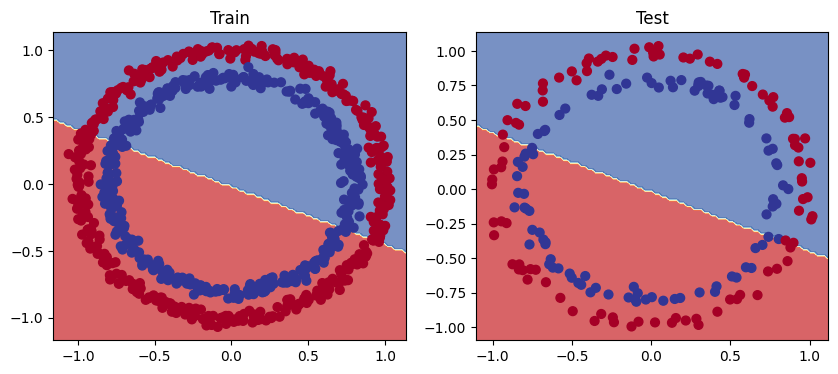

In [25]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_artifact, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_artifact, X_test, y_test)

Hmm ... Something is Missing! 🤔

As you can see we have successfully built a classifier, but... it’s not performing as well as we expected. and we are missing something essential. Can you guess what might be causing this? (take a couple of minutes to think through) 🧐

Well, it looks like we've accidentally built a classifier using a linear regression approach! 😬

Why did that happen? Because we forgot to add the **non-linearity**! In simpler terms, we didn’t apply any activation functions on the hidden layer. But don’t worry, we’ve got you covered! This was totally intentional — we just wanted to show you the true power behind neural networks. 🧠

Now, it's your turn! You’re challenged to bring the power of non-linearity to our model. Oh, and remember when we hinted that you might be tempted to add more layers? 😏

Before we move forward, we want to point out that there are many ways you can boost the performance of Neural Networks. Here are a few ideas to get you started:

- Adding more Hidden Layers
- Increasing the number of neurons in each layer
- Increasing the number of epochs
- Trying out different activation functions
- Experimenting with various optimizers

... and this is just the beginning! Feel free to explore and experiment further using this notebook, for your personal projects. Once you tackle the next challenge, you'll have the skills to start experimenting on your own. 

And yet again ...

**Remember:** Machine Learning is all about learning through experimentation! 🧪🧪🧪 

🎯**Challenge 4: Adding Non-Linearity + More Hidden Layers!**

At this point you have mastery the configuration of Neural Networks using Pytorch. Great job so far! 

1. Now, it's time to enhance the **original architecture** by adding 3 more layers. Each layer should be composed of:

- The first layer should take 2 input features and set <span style="color: rgb(181, 206, 168);">10 neurons</span> to this configuration. 
- The second layer will take the number of features from the first layer, and set <span style="color: rgb(181, 206, 168);">10 neurons</span> to this configuration.
- The third layer will take the output of the second layer and output <span style="color: rgb(181, 206, 168);">1 neuron</span>.

2. Also, you should not forget to include our activation function for each layer by using the Pytorch **nn** Module:

- nn.ReLU()


To help you out, you don't need to worry (but not limited to continue experimenting on your own) about the optimizer and loss_fn configuration. 



In [26]:
### GRADED TASK: Adding Non-Linearity + Hidden Layers ###

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # NEURAL NETWORK ARTIFACTS #
        # 1. ADDING MORE LAYERS TO INCREASE DEPTH
        # Think about how many features come out from the current layer, and how many you want going into the next one.
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)  

        ### YOUR CODE STARTS HERE ###
        self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
        self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
        ### YOUR CODE ENDS HERE ### 

        # 2. ADDING ACTIVATION FUNCTION FUNCTIONALITY
        # We will use an activation function after each hidden layer to introduce non-linearity
        
        ###YOUR CODE STARTS HERE###
        self.relu = nn.ReLU() 
        ###YOUR CODE ENDS HERE###

    def forward(self, x):
        """
        In the forward pass, data flows through the layers sequentially. 
        Here's how we apply the layers and activation functions step by step:

        1. Pass data through `layer_1` (Hidden Layer 1) and define the activation function for its output
        2. Pass the result through `layer_2` (Hidden Layer 2) and define the activation function for its output
        3. Pass the result through `layer_3` (Output Layer) (no activation after it because it's the final prediction)
        """
        ### YOUR CODE STARTS HERE###
        x = self.relu(self.layer_1(x)) 
        x = self.relu(self.layer_2(x))
        x = self.layer_3(x) 
        ### YOUR CODE ENDS HERE###

        return x

model_2 = CircleModelV2().to(device)
optimizer_configurator_v2 = OptimizerConfigurator(model_2)
optimizer_v2 = optimizer_configurator_v2.configure_optimizer()
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [27]:
test_model_v2(CircleModelV2, device)

Model configuration is correct! All tests passed.


In [28]:
train_val_loop_config = TrainingEvaluationLoop(model_2, epochs, optimizer_v2, loss_fn)
model_artifact_v2 = train_val_loop_config.execute_training_loop()

Epoch: 0 | Loss: 0.69738, Acc: 50.00%, | Test Loss:  0.69739, Test acc: 50.00%
Epoch: 100 | Loss: 0.69282, Acc: 49.12%, | Test Loss:  0.69309, Test acc: 45.50%
Epoch: 200 | Loss: 0.69190, Acc: 53.37%, | Test Loss:  0.69220, Test acc: 51.50%
Epoch: 300 | Loss: 0.69075, Acc: 57.00%, | Test Loss:  0.69113, Test acc: 57.00%
Epoch: 400 | Loss: 0.68941, Acc: 59.13%, | Test Loss:  0.68984, Test acc: 57.50%
Epoch: 500 | Loss: 0.68742, Acc: 62.38%, | Test Loss:  0.68799, Test acc: 60.50%
Epoch: 600 | Loss: 0.68439, Acc: 68.88%, | Test Loss:  0.68536, Test acc: 69.50%
Epoch: 700 | Loss: 0.67962, Acc: 76.25%, | Test Loss:  0.68126, Test acc: 74.50%
Epoch: 800 | Loss: 0.67160, Acc: 82.62%, | Test Loss:  0.67437, Test acc: 82.00%
Epoch: 900 | Loss: 0.65819, Acc: 86.25%, | Test Loss:  0.66260, Test acc: 83.50%
All tests passed!


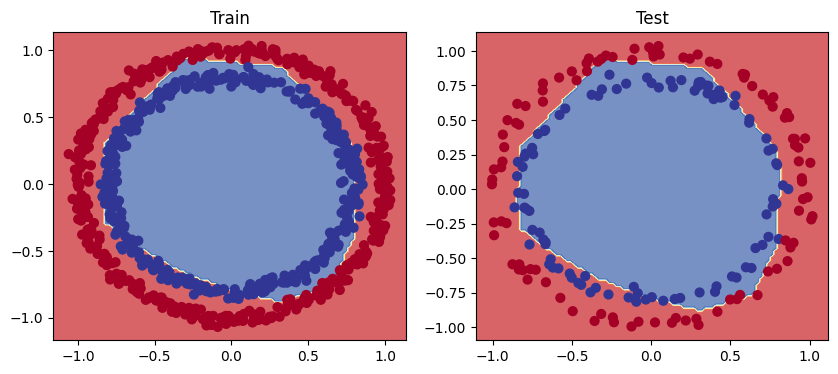

In [29]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_artifact_v2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_artifact_v2, X_test, y_test)

**Take a look at the decision boundary!!!**

Now we’re back to business! We've built our binary classifier using neural networks!

🏆Congratulations! You've Made It! 🏆 

Well done! You've finally done it! You've successfully built and **binary classifier neural network**!. Surely, it was a lot to digest, but you have done an incredible progress. Let's quickly recap the key concepts you've learned throught this lesson:

1. **Configuring Neural Networks:** You’ve learned how to set up a neural network with hidden layers, apply activation functions, and define the forward pass.
2. **Understanding Non-Linearity:** You discovered how important activation functions (like ReLU) are for introducing non-linearity and improving a model performance.
3. **Implementing the Training Loop**: You've learned how to configure and implement a training loop with backpropagation and gradient descent.
4. **Loss Function & Optimizer Setup:** You set up loss functions like **BCEWithLogitsLoss** and configured optimizers like SGD, getting familiar with how they guide model training.
5. **Experimentation:** You have also learned that Machine Learning is all about experimenting!

You are now officially a professional in the field of neural networks! 🌟 

The foundation is laid, and now it’s time to experiment. Apply what you’ve learned and try using your own data to see how the model performs. Continue refining, adjusting, and exploring new possibilities.

Remember, Machine Learning is a journey, and every experiment gets you closer to mastery. Keep learning, keep testing, and who knows? You might be the next to revolutionize the world with your innovations! 🚀